Question 1: What is a Decision Tree, and how does it work in the context of
classification?

->A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It works by splitting the dataset into smaller subsets based on the features’ values, forming a tree-like structure of decisions.

How it works (in classification):

Root Node:
The process starts at the root node, which represents the entire dataset.

Splitting:
The dataset is divided into subsets based on an attribute test (like “Is Age > 30?”).
The algorithm chooses the best feature to split using metrics like:

Gini Impurity

Information Gain (Entropy)

Gain Ratio

Decision Nodes and Leaves:

Decision Nodes represent tests on attributes.

Leaf Nodes represent the final class labels (predicted outputs).

Prediction:
To classify a new instance, it follows the path from the root to a leaf based on feature conditions and assigns the class label at the leaf.

Question 2: Explain the concepts of Gini Impurity and Entropy as impurity
measures.How do they impact the splits in a Decision Tree?

->In a Decision Tree, impurity measures determine how good a split is — i.e., how well a feature separates the data into pure classes. Two common impurity measures are Gini Impurity and Entropy.

1. Gini Impurity

It measures the probability of misclassifying a randomly chosen element from a dataset.

Formula:

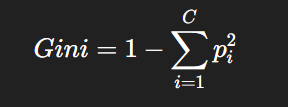

where
𝑝
𝑖
 = probability of class i, and C = number of classes.

Interpretation:

Gini = 0 → perfectly pure (all samples in one class)

Gini = 0.5 → maximum impurity (two classes equally mixed)

2. Entropy

Entropy measures the amount of randomness or disorder in the data.

Formula:

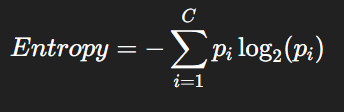

Interpretation:

Entropy = 0 → perfectly pure node

Higher entropy → more disorder or mixed classes

Information Gain:
Decision Trees using entropy select the feature that gives the highest Information Gain, the largest reduction in entropy after splitting.

3. Impact on Splits

Both measures aim to create purer child nodes.

Lower impurity → better split.

The algorithm picks the attribute that minimizes impurity (Gini) or maximizes Information Gain (Entropy).


Question 3: What is the difference between Pre-Pruning and Post-Pruning in Decision Trees? Give one practical advantage of using each.

->Pruning in Decision Trees is a technique used to reduce overfitting by simplifying the tree structure — i.e., by removing unnecessary branches that don’t add much predictive power.
There are two main types: Pre-Pruning and Post-Pruning.

1. Pre-Pruning (Early Stopping)

The tree stops growing early before it perfectly classifies all training examples.

The algorithm sets conditions like:

Maximum depth of tree

Minimum number of samples required to split a node

Minimum information gain threshold

Example:
Stop splitting if a node has fewer than 5 samples.

Advantage:
Faster training and prevents overfitting early by keeping the model simple.

2. Post-Pruning (Pruning After Training)

The tree is first grown fully, and then unnecessary branches are removed based on validation performance.

It evaluates subtrees and prunes branches that do not improve accuracy on the validation set.

Example:
Use a validation set to test if removing a branch increases or maintains accuracy.

Advantage:
Higher accuracy because it allows the tree to explore all patterns before removing the unhelpful ones.


Question 4: What is Information Gain in Decision Trees, and why is it important for choosing the best split?

->Information Gain (IG) is a measure used in Decision Trees to decide which feature to split on at each step. It tells us how much “information” (or reduction in impurity/uncertainty) a feature provides about the target variable.

It is calculated as:

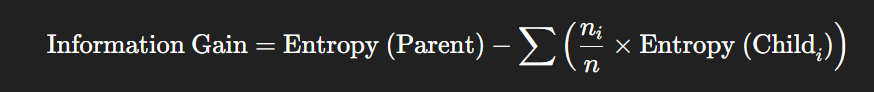

Where:

𝑛
𝑖
= number of samples in the child node

n = total number of samples in the parent node

Importance:

Higher Information Gain means the feature provides a better split and helps classify data more effectively.

The Decision Tree chooses the feature with the highest Information Gain at each node, ensuring that each split reduces impurity and improves prediction accuracy.

Example:
If splitting on “Age” reduces entropy more than “Income,” then “Age” is chosen as the splitting feature because it gives higher Information Gain.


Question 5: What are some common real-world applications of Decision Trees, and
what are their main advantages and limitations?

->Applications:

Medical Diagnosis:
Used to predict diseases or recommend treatments based on patient data.
Example: Predicting whether a tumor is malignant or benign.

Finance and Banking:
Used for credit scoring, loan approval, and fraud detection.
Example: Deciding if a customer is eligible for a loan.

Marketing and Sales:
Helps segment customers and predict buying behavior.
Example: Identifying which customers are likely to respond to a campaign.

Manufacturing and Quality Control:
Used to identify factors leading to defects or equipment failures.

Education:
Predicting student performance or dropout risk based on attendance and grades.

Advantages:

Easy to interpret and visualize (like a flowchart).

Handles both numerical and categorical data.

Requires little data preprocessing.

Captures non-linear relationships.

Fast and efficient for small to medium datasets.

Limitations:

Prone to overfitting (especially deep trees).

Sensitive to small changes in data, which can produce different trees.

Bias toward features with more levels (categories).

Less accurate compared to ensemble methods like Random Forests or Gradient Boosting.

In [ ]:
'''Question 6: Write a Python program to:
● Load the Iris Dataset
● Train a Decision Tree Classifier using the Gini criterion
● Print the model’s accuracy and feature importances'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("\nFeature Importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.3f}")


Model Accuracy: 1.0

Feature Importances:
sepal length (cm): 0.000
sepal width (cm): 0.017
petal length (cm): 0.906
petal width (cm): 0.077


In [ ]:
'''Question 7: Write a Python program to:
● Load the Iris Dataset
● Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to
a fully-grown tree.
'''

import pandas as pd

from sklearn.datasets import load_iris
data = load_iris()

x = data.data
y = data.target

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=3)
model2 = DecisionTreeClassifier()

model1.fit(x_train,y_train)

model2.fit(x_train,y_train)

y_pred_3 = model1.predict(x_test)

y_pred_full = model2.predict(x_test)

from sklearn.metrics import accuracy_score

print("the accuracy of the tree with max_depth =3 : ",accuracy_score(y_test,y_pred_3))
print("the accuracy of the tree with full_depth : ",accuracy_score(y_test,y_pred_full))

the accuracy of the tree with max_depth =3 :  0.9666666666666667
the accuracy of the tree with full_depth :  0.9666666666666667


In [ ]:
'''Question 8: Write a Python program to:
● Load the Boston Housing Dataset
● Train a Decision Tree Regressor
● Print the Mean Squared Error (MSE) and feature importances
'''

import pandas as pd

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

x = data.data
y = data.target


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


from sklearn.metrics import mean_squared_error
print("The Mean Squared Error (MSE) is:", mean_squared_error(y_test, y_pred))


print("\nFeature Importances:")
for feature, importance in zip(data.feature_names, model.feature_importances_):
    print(f"{feature}: {importance:.3f}")


The Mean Squared Error (MSE) is: 0.5012547266169817

Feature Importances:
MedInc: 0.507
HouseAge: 0.051
AveRooms: 0.032
AveBedrms: 0.030
Population: 0.033
AveOccup: 0.146
Latitude: 0.099
Longitude: 0.102


In [1]:
'''Question 9: Write a Python program to:
● Load the Iris Dataset
● Tune the Decision Tree’s max_depth and min_samples_split using GridSearchCV
● Print the best parameters and the resulting model accuracy
'''

import pandas as pd

from sklearn.datasets import load_iris
data = load_iris()

x = data.data
y = data.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 3, 4, 5]
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)


print("Best Parameters:", grid.best_params_)

from sklearn.metrics import accuracy_score
y_pred = grid.predict(x_test)
print("Model Accuracy with Best Parameters:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Model Accuracy with Best Parameters: 0.9666666666666667


Question 10: Imagine you’re working as a data scientist for a healthcare company that
wants to predict whether a patient has a certain disease. You have a large dataset with
mixed data types and some missing values.
Explain the step-by-step process you would follow to:
● Handle the missing values
● Encode the categorical features
● Train a Decision Tree model
● Tune its hyperparameters
● Evaluate its performance
And describe what business value this model could provide in the real-world
setting.

->1. Handle Missing Values

For numerical columns → replace with mean/median.

For categorical columns → replace with most frequent value or a new label like "Unknown".

If a column has too many missing values → drop it.

2. Encode Categorical Features

Label Encoder for target variable.

One-Hot Encoding for nominal features (no order).

Ordinal Encoding for ordered categories (e.g., low, medium, high).

3. Train the Decision Tree

Split data into train and test sets.

Use DecisionTreeClassifier() from scikit-learn.

Fit the model on training data and make predictions on test data.

4. Tune Hyperparameters

Use GridSearchCV or RandomizedSearchCV to find best values for:

max_depth

min_samples_split

criterion (gini or entropy)

min_samples_leaf

5. Evaluate Performance

Use metrics like:

Accuracy

Precision

Recall

F1-score

Confusion Matrix

ROC-AUC

Business Value

Helps in early disease prediction.

Supports doctors in decision-making.

Reduces cost and time of unnecessary tests.

Improves patient care and outcomes.